__Xiangyi Cheng (xxc283)__

# Concepts
Based on the research, most of the edge detections can be grouped into two categories, search-based and zero-crossing based. The search-based methods focus on computing a meature of edge strenth such as the gradient magnitude, then searching for the local direction of the gradient magnitude, or we say gradient direction. The zero-crossing based methods is to search zero crossings in a second-order derivative, usually the zero-crossings of the Laplacian or of a non-linear differential expression.


# Implement
There are several mature libraries in opencv to detect the edge of the objects such as canny, sobel and laplacian edge detector. First, import opencv,numpy and matplotlib libraries into the code.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Read the image in which the edge of the object needs to be detected. Because OpenCV uses BGR as its default color order while matlibplot uses RGB, conversion is needed to change the channels.

In [2]:
img=cv2.imread('eecs531-xxc283/A1/sydney.jpg')
img_c=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

Plot the original image.

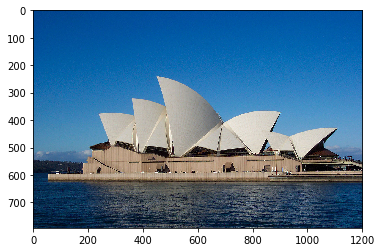

In [3]:
plt.imshow(img_c)
plt.show()

Firstly, Canny edge detector is used with different threshold (200,300,500) to find the edge.

In [4]:
canny200=cv2.Canny(img,200,200)
cv2.imwrite('eecs531-xxc283/A1/canny200.jpg',canny200)
canny300=cv2.Canny(img,300,300)
cv2.imwrite('eecs531-xxc283/A1/canny300.jpg',canny300)
canny500=cv2.Canny(img,500,500)#cv2.imwrite('eecs531-xxc283/A1/canny500.jpg',canny500)

Plot the result of Canny edge detection with threshold (200,200).

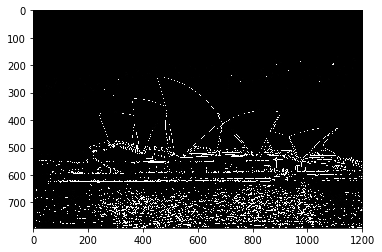

In [5]:
canny200=cv2.imread('eecs531-xxc283/A1/canny200.jpg')
canny200=cv2.cvtColor(canny200,cv2.COLOR_BGR2RGB)
plt.imshow(canny200)
plt.show()

Plot the result of Canny edge detection with threshold (300,300).

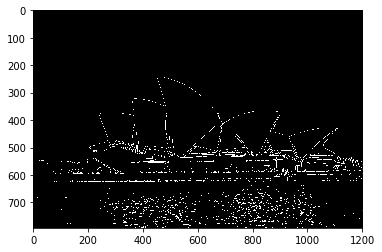

In [6]:
canny300=cv2.imread('eecs531-xxc283/A1/canny300.jpg')
canny300=cv2.cvtColor(canny300,cv2.COLOR_BGR2RGB)
plt.imshow(canny300)
plt.show()

Plot the result of Canny edge detection with threshold (500,500).

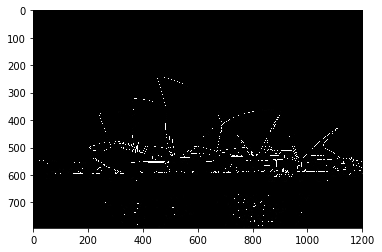

In [7]:
canny500=cv2.imread('eecs531-xxc283/A1/canny500.jpg')
canny500=cv2.cvtColor(canny500,cv2.COLOR_BGR2RGB)
plt.imshow(canny500)
plt.show()

From above, we can say that with bigger threshold number, the possibility to avoid noises is higher. However, it means some real edges are excluded as well. Therefore, a proper threshold is essential to the detection.

Secondly, the library of Laplacian edge detector is called.

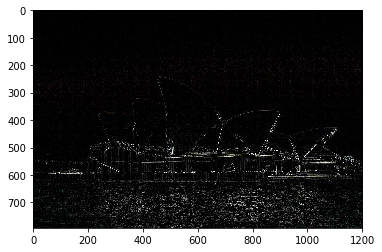

In [8]:
laplacian=cv2.Laplacian(img,cv2.CV_64F)
cv2.imwrite('eecs531-xxc283/A1/laplacian.jpg',laplacian)
laplacian=cv2.imread('eecs531-xxc283/A1/laplacian.jpg')
laplacian=cv2.cvtColor(laplacian,cv2.COLOR_BGR2RGB)
plt.imshow(laplacian)
plt.show()

Lastly, Sobel library is called to do the edge detection.
In the x direction, the code is as below.

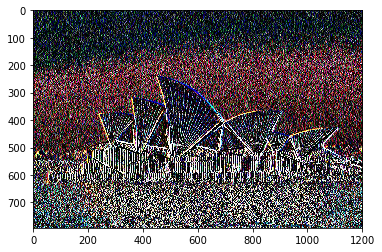

In [9]:
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
cv2.imwrite('eecs531-xxc283/A1/sobelx.jpg',sobelx)
sobelx=cv2.imread('eecs531-xxc283/A1/sobelx.jpg')
sobelx=cv2.cvtColor(sobelx,cv2.COLOR_BGR2RGB)
plt.imshow(sobelx)
plt.show()

In the y direction, the code is as below.

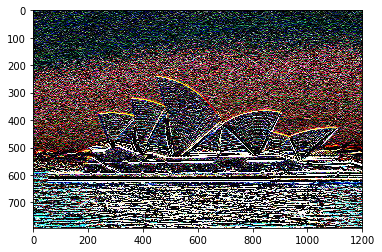

In [10]:
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
cv2.imwrite('eecs531-xxc283/A1/sobely.jpg',sobely)
sobely=cv2.imread('eecs531-xxc283/A1/sobely.jpg')
sobely=cv2.cvtColor(sobely,cv2.COLOR_BGR2RGB)
plt.imshow(sobely)
plt.show()

# Conclusion and Analysis
Compared the results collected from these three approaches, the noise mostly excluded from Canny detector and less from Sobel detector. However, the shape of the object are revealed most clearly from Sobel detector. this is because Canny edge detector goes further than Sobel detector by removing speckle noise with a low pass filter first, then applying a Sobel filter, and then doing non-maximum suppression to pick out the best pixel for edges when there are multiple possibilities in a local neighborhood. And for the Laplacian detector, unless Sobel uses two kernels, it only applies one kernel but calculates second order derivatives in a single pass. Therefore, Laplacians are computationally faster.